## Massive data analysis and mining
### Discover clustering techniques

## 1) Libraries importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## 2) K-Means clustering
### Dataset creation

KMEANS  
  
Hyperparameters  
> nb_clusters	(to specify)  
  
HOW DOES IT WORK ?  
  
Takes random ${nb_clusters} points as centers  
Compute euclidian distances from centers to each point in the dataset  
Group points that are closer to a center with this center  
  
Compute barycenter of each group and take them as new centers  
  
Restart until convergence of the centers  

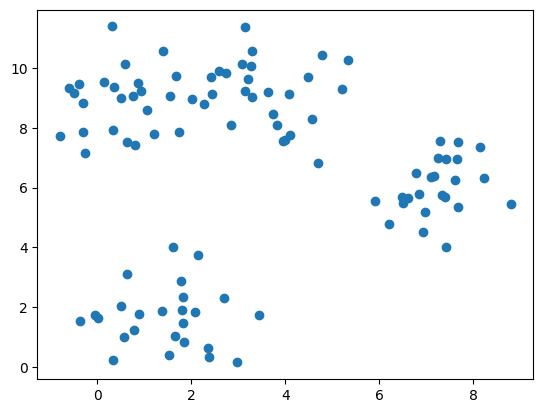

In [24]:
X, y = make_blobs(n_samples=100, centers=4, center_box=(0,10), cluster_std= 1, random_state=42) #For reproducibility
plt.scatter(X[:,0],X[:,1])
plt.show()

### Model training

In [15]:
model = KMeans(n_clusters=4)
model.fit(X)

C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

### Clusters results

[1 2 3 2 1 2 0 0 0 3 3 2 2 0 3 1 1 0 1 1 3 1 1 0 0 3 0 1 1 2 2 0 2 1 3 3 3
 3 0 0 1 0 2 3 3 2 2 1 1 0 0 0 0 2 1 1 3 3 0 1 2 0 1 2 1 1 2 1 0 2 0 2 1 3
 2 1 2 1 2 2 0 2 3 3 3 3 3 2 3 0 0 2 3 2 3 3 3 0 1 0]


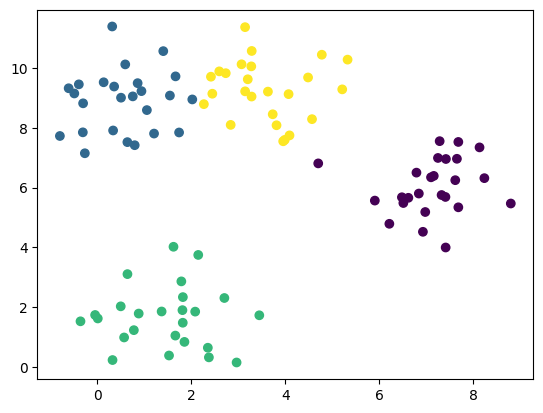

In [16]:
labels = model.labels_
print(labels)
plt.scatter(X[:,0],X[:,1], c=labels)
plt.show()

### Centroids results

[[7.12447823 6.03463664]
 [0.54750659 8.87869141]
 [1.46486669 1.67533513]
 [3.5733714  9.243906  ]]


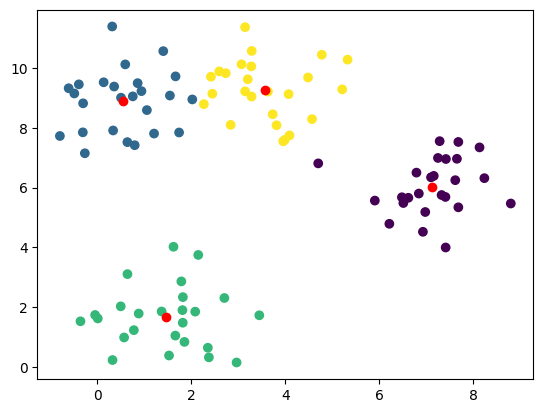

In [18]:
centers = model.cluster_centers_
print(centers)
plt.scatter(X[:,0],X[:,1], c=labels)
plt.scatter(centers[:,0],centers[:,1], c='r')
plt.show()

### Optimizing cluster number

A) Inertia and Elbow method

Mean (or sum of) distance between centers and respective cluster points

166.93939813734573


C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

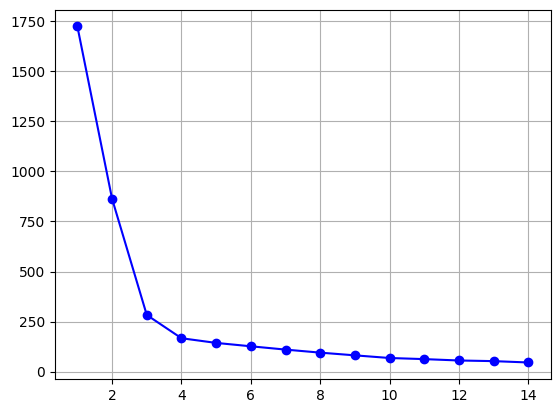

In [22]:
inertia = model.inertia_
print(inertia)

inertia_list = []
k_range = range(1, 15)
for k in k_range:
    model_t = KMeans(n_clusters=k)
    inertia = model_t.fit(X).inertia_
    inertia_list.append(inertia)
plt.plot(k_range, inertia_list, 'bo-')
plt.grid(visible=True)
plt.show()

B) Silhouette and Calinski-Harabasz score

**Silhouette score** :

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

**Calinski Harabasz score** : 

The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion. The Calinski-Harabasz index ranges from 0 (worst classification) to +infinity (best classification). It depends strongly on N (the number of points in the sample), it increases linearly with N.



C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\naxel\IA\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

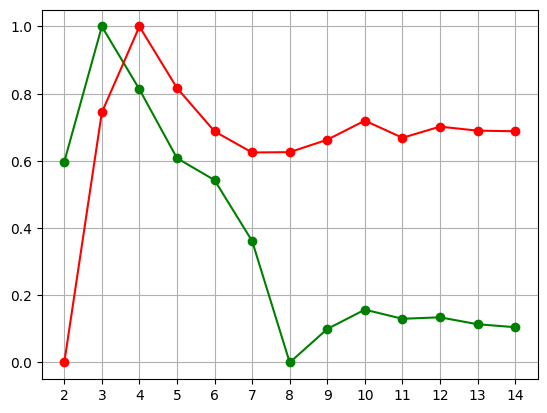

In [23]:
silhouette_list = []
calinski_harabasz_list = []
k_range = range(2, 15)

for k in k_range:
    model_t = KMeans(n_clusters=k)
    labels_t = model_t.fit(X).labels_
    silhouette_list.append(silhouette_score(X, labels_t))
    calinski_harabasz_list.append(calinski_harabasz_score(X, labels_t))
    
silhouette_list = minmax_scale(silhouette_list)
calinski_harabasz_list = minmax_scale(calinski_harabasz_list)
plt.plot(k_range, silhouette_list, 'go-')
plt.plot(k_range, calinski_harabasz_list, 'ro-')
plt.grid(visible=True)
plt.xticks(k_range)
plt.show()

### Overview

**K-means advantages**

- easy to implement and interpret
- fast and efficient for large datasets

**k-means disadvantages**

- not behave very well when the clusters have varying sizes, different densities, or nonspherical shapes

## 3) DBSCAN clustering
(Density-Based Spatial Clustering of Applications with Noise)

DBSCAN

Hyperparameters
> epsilon	(to specify); distance to nearest points - def = 0.5
> min_samples	(to specify) - def = 5

HOW DOES IT WORK ?

Check for each point if it's a core point by plotting a circle with ray=epsilon around it. If there is at lest min_samples points it the circle, then it's a core point  
Choose a random core point  
Add all core points in its circle in its cluster  

### Dataset creation

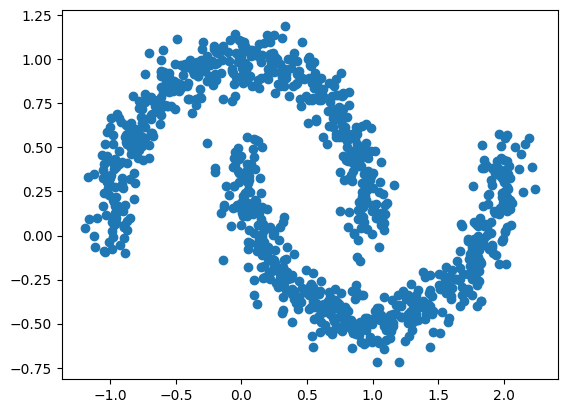

In [26]:
X, y = make_moons(n_samples=1000, noise=0.09, random_state=42)
plt.scatter(X[:,0],X[:,1])
plt.show()

epsilon (0.5) / min_samples (5)

Core points  vs Non-core points

### Model training

In [27]:
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(X)

DBSCAN()

### Labels results

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

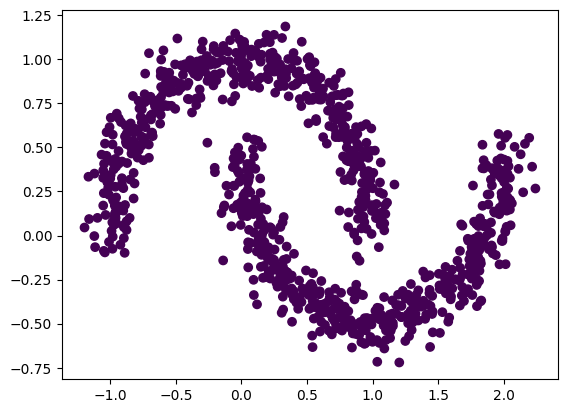

In [30]:
labels_dbscan = model.labels_
print(labels_dbscan)
plt.scatter(X[:,0],X[:,1], c=labels_dbscan)
plt.show()

### Epsilon optimization

A) Elbow method

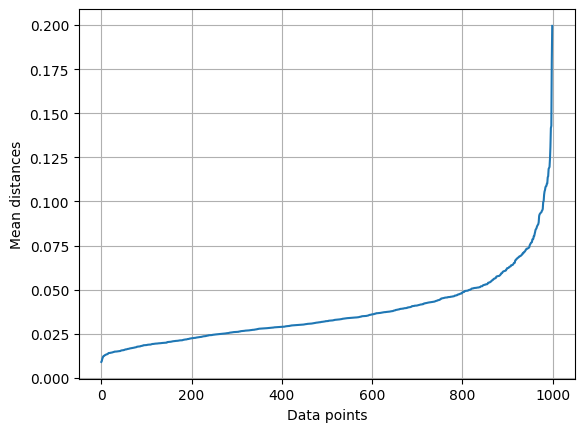

In [34]:
MIN_SAMPLES = 4     # 2 times nb features

model = NearestNeighbors(n_neighbors=MIN_SAMPLES).fit(X)
distances, _ = model.kneighbors(X)
avg_distance = np.mean(distances[:, 1:], axis=1)
sorted_distances = np.sort(avg_distance)
plt.plot(sorted_distances)
plt.grid(visible=True)
plt.xlabel('Data points')
plt.ylabel('Mean distances')
plt.show()

Results:

In [39]:
EPS_SEARCH_RANGE = (0.05, 0.125, 0.0025)

B) Grid search

Best eps =  0.12250000000000007


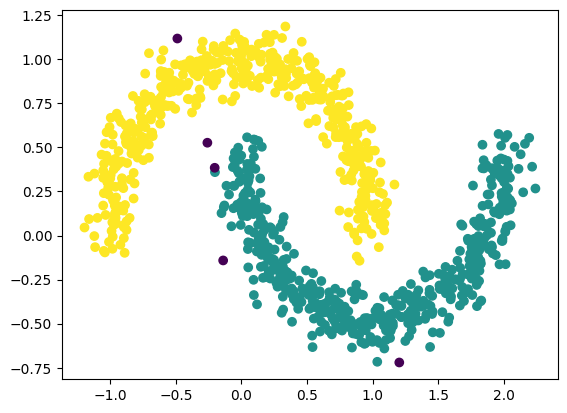

In [44]:
epsilon_values = np.arange(start=EPS_SEARCH_RANGE[0],
                           stop=EPS_SEARCH_RANGE[1],
                           step=EPS_SEARCH_RANGE[2])

max_score = 0
best_epsilon = 0.5
for eps in epsilon_values:
    model = DBSCAN(eps=eps, min_samples=MIN_SAMPLES)
    labels = model.fit(X).labels_
    unique_labels = set(labels)
    nb_labels = len(unique_labels)
    if nb_labels > 1:
        sil_score = silhouette_score(X, labels)
        if sil_score > max_score:
            MAX_SCORE = sil_score
            best_epsilon = eps

print('Best eps = ', best_epsilon)
best_model = DBSCAN(eps=best_epsilon, min_samples=MIN_SAMPLES)
labels = best_model.fit(X).labels_
plt.scatter(X[:,0],X[:,1], c=labels)
plt.show()

### Centroïds

Centroid for cluster 0: [ 1.00402038 -0.13861105]
Centroid for cluster 1: [0.00110427 0.63160858]


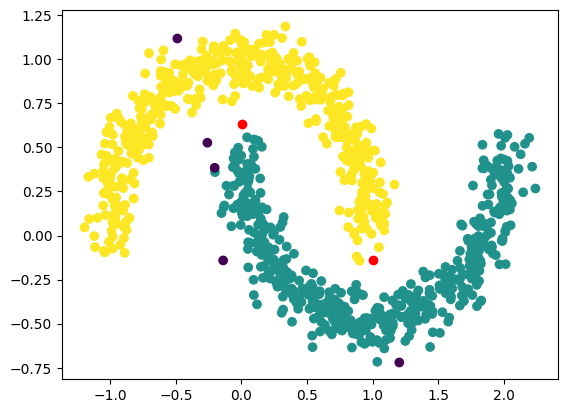

In [45]:
plt.scatter(X[:,0],X[:,1], c=labels)
unique_labels = set(labels)
unique_labels.discard(-1)

for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    print(f"Centroid for cluster {label}: {centroid}")
    plt.scatter(centroid[0],centroid[1], c='r')
plt.show()

### Overview

**DBSCAN advantages**
- can discover clusters of arbitrary shape, unlike k-means
- it is robust to noise, as it can identify points that do not belong to any cluster as outliers.
- it does not require the number of clusters to be specified in advance

**DBSCAN disadvantages**
- it is sensitive to the choice of the eps and min_samples parameters
- it has a high computational cost when the number of data points is large